### Fill out:
Name & Surname: Jared Roff

Student ID: 34987444

## W9&W10 post studio exercises (multivariate linear regression, regularisation)

Enter your solution in the cell(s) below each exercise. Add couple of inline comments explaining your code. Don't forget to add comments in markdown cell after each exercise. Missing comments (in markdown cells and/or inline) and late submissions will incur penalties.

Once done, drag&drop your python file to your ADS1002-name github account.

Copy url of this file on github to appropriate folder on Moodle by 09.30am prior your next studio. 

Solutions will be released later in the semester.

Max 10 marks - 2.5 marks per each exercise.

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
import pandas as pd

%matplotlib inline

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

from logitplots import plt_confusion_matrix, plt_decision_boundaries, plt_correlation_matrix

## Exercises (Logistic regression)

In this exercise you are going to construct a simple one vs rest multiclass classifier based on the probabilities for each of the binary problems for the three iris species. A one-vs-rest classification scheme constructs multiple models (one for each class) where each model predicts a binary classification and combines the results to come up with a single prediction.

For this problem, only use the first two features, i.e., `sepal length` and `sepal width` (don't standardise/normalise/etc). 

The steps for this multiclass classifier are:

* Exercise 1: 
    * Create a new features dataframe which contains only the first two columns of the iris data frame. 
    * For each of the iris categories, i.e., species_setosa, species_versicolor, and species_virginica, model the data using Logistic Regression and calculate the probabilities for the testing set of the category being correct. Store these probabilites in an array (or dataframe). For each category you will need to re-do the train-test split, but make sure you use the same random state (random state 1). Alternatively, split the data set initially with all three labels, and then work on each category. The necessary one-hot encoding has already been performed.
    * Show first 5 (rows of) probabilities for all (3) species.
* Exercise 2: 
    * For each instance in feature space (testing set), choose the category with the highest probability. The function `numpy.argmax()` will be useful. Show first 5 entries for sepal_length, sepal_width, max probability and predicted class.
    * Plot the final classification for the testing set in feature space, with colours based on the predicted category.

**Exercises 1 - 2** below correspond to the two points outlined above.

Q: After completing the code below and inspecting the results, comment on which class(es) appear most difficult to predict accurately. Can you suggest any improvements to the model which might result in better accuracy?

In [43]:
iris = sns.load_dataset('iris') # load the dataset from seaborn

species_one_hots =  pd.get_dummies(iris.species, prefix = 'species')
iris = pd.concat([iris, species_one_hots], axis = 1)

### Exercise 1

In [60]:
X_iris = iris.loc[:, ["sepal_length","sepal_width"]] # New dataframe with only first two columns

X_iris.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, species_one_hots, random_state=1)

prob_df = pd.DataFrame()

# Iterate over each species 
for species in y_train.columns:
    # Train for current species
    model = LogisticRegression(random_state=1)
    model.fit(X_train, y_train[species])
    
    # Predict probabilities for testing set
    prob_df[species] = model.predict_proba(X_test)[:, 1]  # Add the probabilities for the positive class

prob_df.head()

,species_setosa,species_versicolor,species_virginica
0,0.726027,0.045130,0.230394
1,0.312145,0.494155,0.103261
2,0.014195,0.316046,0.671267
3,0.879052,0.051033,0.120995
4,0.001919,0.100075,0.956648


### Exercise 2

In [63]:
predicted_classes = np.argmax(prob_df.values, axis=1)

# Map the numeric predictions back to the species names
class_mapping = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
predicted_species = [class_mapping[pred] for pred in predicted_classes]

# Add predicted species and max probability to the test data
X_test['max_probability'] = prob_df.max(axis=1)  # Maximum probability from the three classes
X_test['predicted_class'] = predicted_species    # Predicted species based on highest probability

X_test.head()

,sepal_length,sepal_width,max_probability,predicted_class
14,5.8,4.0,0.385384,Setosa
98,5.1,2.5,NaN,Versicolor
75,6.6,3.0,NaN,Virginica
16,5.4,3.9,0.477338,Setosa
131,7.9,3.8,NaN,Virginica


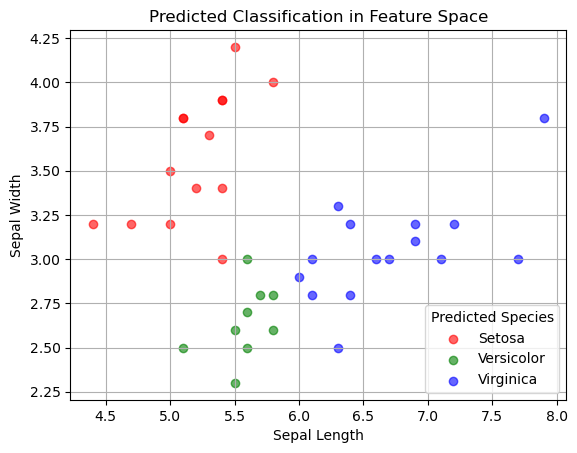

In [65]:
for species in class_mapping.values():
    subset = X_test[X_test['predicted_class'] == species]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], color=colors[species], label=species, alpha=0.6)

# Add labels and legend
plt.title('Predicted Classification in Feature Space')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='Predicted Species')
plt.grid(True)
plt.show()

Q: After completing the code below and inspecting the results, comment on which class(es) appear most difficult to predict accurately. Can you suggest any improvements to the model which might result in better accuracy?

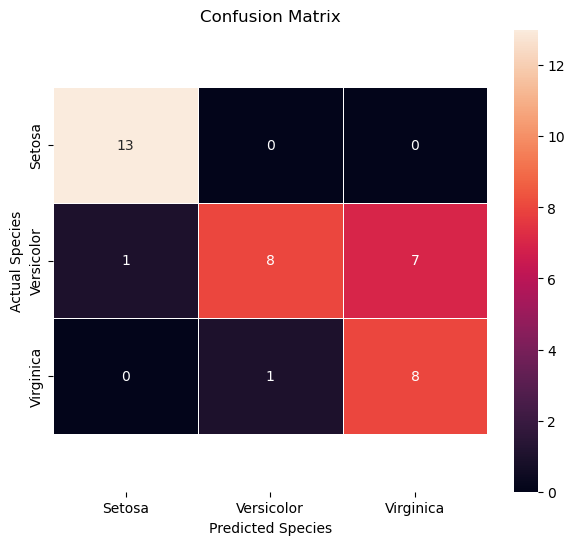

In [74]:
class_names = ['Setosa', 'Versicolor', 'Virginica']

# Create the confusion matrix
cnf_matrix = confusion_matrix(true_species_names, predicted_species, labels=class_names)

# Create a dataframe from the confusion matrix with class names as row and column labels
cmatrix = pd.DataFrame(
    data=cnf_matrix,
    columns=class_names,
    index=class_names
)

# Plot the confusion matrix as a heatmap
f, ax = plt.subplots(figsize=(7,6))  # Initialize the plot and axes
sns.heatmap(cmatrix, annot=True, linewidths=.5)  # Plot heatmap

# Add titles and labels
plt.title('Confusion Matrix')
plt.ylabel('Actual Species')
plt.xlabel('Predicted Species')

# Adjust the bottom and top of the figure to ensure labels are visible
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Show the plot
plt.show()

As seen by the confusion matrix the veriscolor is the most difficult to predict accurately as it has predicted 7 veriscolor's as virginica's. This could be improved by using more than just sepal_length and sepal_width, and including petal_width and petal_length to help further distinguish between the two species.

## Exercises (Decision trees)

For these exercises we will model a dataset of the properties of wheat seeds, which you can download from GitLab: 

[seeds_dataset](https://gitlab.erc.monash.edu.au/bads/data-challenges-resources/-/blob/main/Machine-Learning/Supervised-Methods/Decision-Trees/seeds_dataset.csv)

This is originally from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/seeds). The seedtype is an integer (1, 2, or 3) corresponding to the three classes `Kama`, `Rosa` and `Canadian` in the classes list below.

Run all the cells below before writing your solutions; don't standardise/normalise/etc.

In [26]:
seeds = pd.read_csv('seeds_dataset.csv', header=None, 
                   names=['area','perimeter','compactness','length','width','asymmetry',
                         'groovelength','seedtype'])
classes = ['Kama', 'Rosa', 'Canadian']

In [27]:
seeds.head()

,area,perimeter,compactness,length,width,asymmetry,groovelength,seedtype
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Split the data into features and labels, and into a training and testing set.

In [28]:
X_ex = seeds.drop('seedtype', axis = 1)
y_ex = seeds['seedtype']

X_train, X_test, y_train, y_test = train_test_split(
    X_ex, y_ex, random_state = 42
)

### Exercise 3

Create a simple Decision Tree of maximum depth=3 and fit the training data to this model.

Plot the decision tree for this model, and identify the most significant features for the classification of this dataset.

In [34]:
# instantatiate the DTC, set random_state so results are repeatable
df_dtc = DecisionTreeClassifier(max_depth =3, random_state = 42) # ensure max depth is 3
df_dtc = df_dtc.fit(X_train, y_train) # train the model using the training set

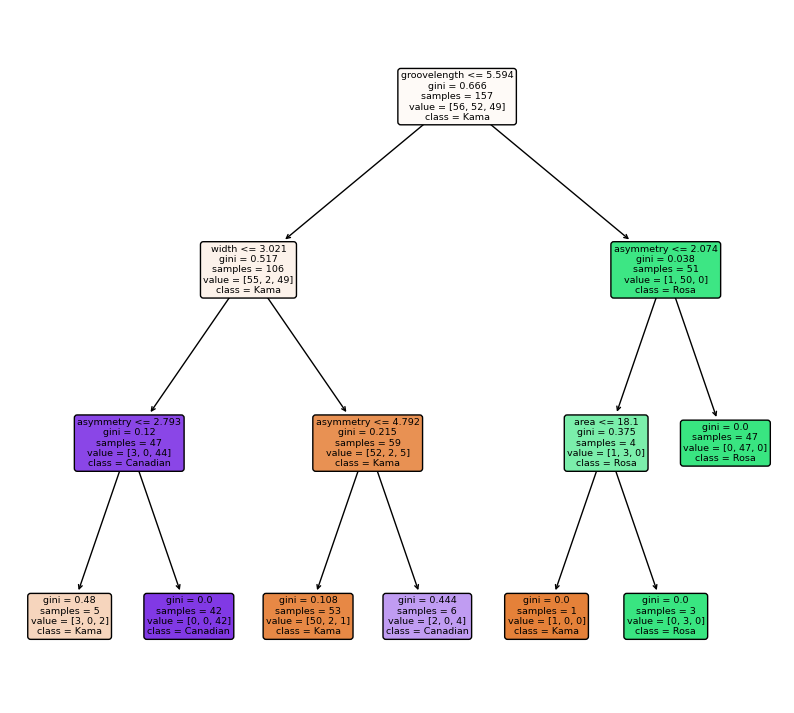

In [35]:
fig, ax = plt.subplots(figsize=(10,9)) # initialise the plots and axes
# plot the decision tree for the model df_dtc
plot_tree(df_dtc, 
 filled = True, # colour the nodes according to the classifaction
 rounded = True, # make the nodes have rounded corners
 class_names = ["Kama", "Rosa", "Canadian"], # use these names for targets
 feature_names = list(X_ex.columns) # use these names for features
 );

The groovelength, width and asymmetry are the most significant figures for classification as they are higher in the tree.

### Exercise 4

Plot the confusion matrix for this model, and calculate the accuracy.

Decision Tree Accuracy: 0.887


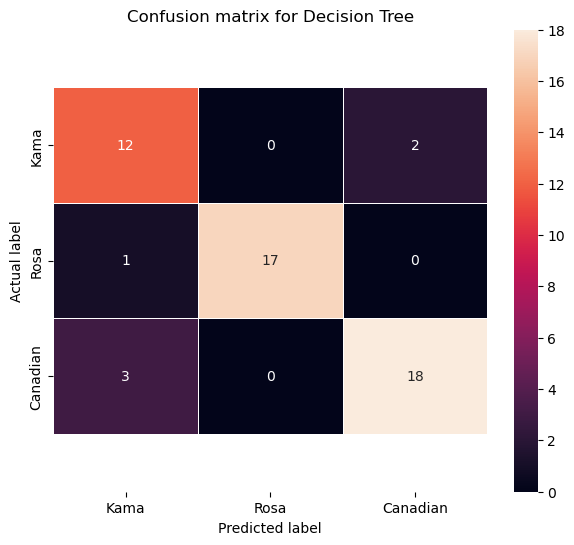

In [38]:
Y_pred = df_dtc.predict(X_test) # calculate the predictions of the model for our test set
# plot the confusion matrix for the test and predicted target values
cm = confusion_matrix(y_test, Y_pred)
plt_confusion_matrix(cm, ["Kama", "Rosa", "Canadian"], 'Decision Tree') 

print(f'Decision Tree Accuracy: {accuracy_score(y_test, Y_pred):.3f}') # calculate and print the accuracy score

Decision Tree Accuracy: 0.887